# CTM MILP Formulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
import time

from ctmmodels.const import *
from ctmmodels.nophasing import Constraint5Model
from ctmmodels.altphasing import Constraint5AltPhasingModel

## Using the Module

In [2]:
# model1 = Constraint5Model(
#     sat_flow_rate=600,
#     demand=450,
# )
# model1.generate()

model2 = Constraint5AltPhasingModel(
    sat_flow_rate=600,
    demand=450,
)
model2.generate()

In [4]:
print("New:")
model2.solve(log_output=True)

New:
Solving...
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 1860.000000 after 0.00 sec. (0.13 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 1184 rows and 292 columns.
MIP Presolve modified 776 coefficients.
Aggregator did 340 substitutions.
Reduced MIP has 2788 rows, 1648 columns, and 10368 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (9.83 ticks)
Probing time = 0.03 sec. (0.19 ticks)
Tried aggregator 1 time.
MIP Presolve modified 8 coefficients.
Reduced MIP has 2788 rows, 1648 columns, and 10368 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (7.12 ticks)
Probing time = 0.01 sec. (0.19 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.03 sec. (22.73 ticks)

        Nodes                                 

0.9511449337005615

Parameters: Timestep..Timerange, G_min..G_max, Inflow Demand

---

Parameters: 3..20, 2..5, 600

Old: 0.028

New: 3.745

---

Parameters: 1..20, 2..5, 600

Old: 12.471

New: 11.575

---

Parameters: 1..20, 2..5, 900

Old: 7.483

New: 3.829

## Showing the Cell Capacities

In [5]:
model = model2

In [6]:
df_x, df_y, df_g = model.return_solution()

In [7]:
df_x_source = df_x[df_x.cell == (CELL_SOURCE,0,1)].sort_values(by='timestep')
df_x_normal0 = df_x[df_x.cell == (CELL_NORMAL,0,1)].sort_values(by='timestep')
df_x_normal1 = df_x[df_x.cell == (CELL_NORMAL,1,1)].sort_values(by='timestep')
df_x_normal2 = df_x[df_x.cell == (CELL_NORMAL,2,1)].sort_values(by='timestep')
df_x_left = df_x[df_x.cell == (CELL_MOVEMENT,THROUGH_TURN,1)].sort_values(by='timestep')
df_x_sink = df_x[df_x.cell == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].sort_values(by='timestep')

df_x_approach = df_x_source.append(df_x_normal1).append(df_x_normal2).append(df_x_normal0).append(df_x_left).append(df_x_sink)
df_x_approach = df_x_approach.pivot(index='timestep', columns='cell', values='volume')
df_x_approach

cell,"(0, 0, 1)","(1, 0, 3)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,,
0,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1,1.166667,0.000000e+00,0.000000,0.833333,0.000000,0.000000
2,1.000000,0.000000e+00,0.000000,1.166667,0.833333,0.000000
3,1.000000,0.000000e+00,0.000000,1.333333,0.833333,0.833333
4,1.000000,0.000000e+00,0.666667,1.333333,1.000000,0.833333
5,1.000000,8.333333e-01,0.666667,1.000000,1.333333,1.000000
6,1.000000,8.333333e-01,0.666667,1.833333,0.166667,1.500000
7,1.666667,8.333333e-01,0.666667,1.333333,0.833333,0.833333
8,1.333333,6.666667e-01,0.666667,1.333333,1.333333,0.833333


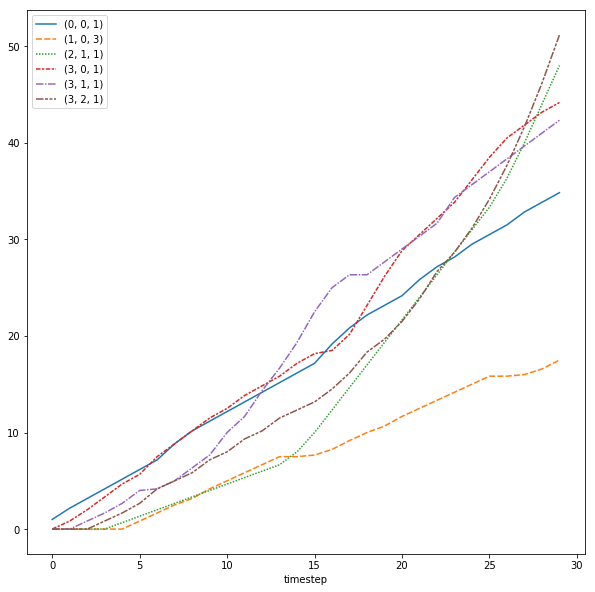

In [8]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_x_approach.cumsum())

This linear, cascading cumulative sum of consecutive cells (except for the through cell) means that the turning ratio is working fine.

In [9]:
df_y_source = df_y[df_y.cell_from == (CELL_SOURCE,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal0 = df_y[df_y.cell_from == (CELL_NORMAL,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal1 = df_y[df_y.cell_from == (CELL_NORMAL,1,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_left = df_y[df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_sink = df_y[df_y.cell_from == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')

df_y_approach = df_y_source.append(df_y_normal1).append(df_y_normal2).append(df_y_normal0).append(df_y_left).append(df_y_sink)
df_y_approach.reset_index(inplace=True)
df_y_approach = df_y_approach.pivot(index='timestep', columns='cell_from', values='flow')
df_y_approach

cell_from,"(0, 0, 1)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,
0,0.833333,0.000000,0.000000,0.000000,0.000000
1,1.166667,0.000000,0.833333,0.000000,0.000000
2,1.000000,0.000000,0.833333,0.833333,0.000000
3,1.000000,0.000000,1.000000,0.833333,0.833333
4,1.000000,0.666667,1.333333,1.000000,0.833333
5,1.000000,0.666667,0.166667,1.333333,0.833333
6,0.333333,0.666667,0.833333,0.166667,0.833333
7,1.333333,0.666667,1.333333,0.833333,0.833333
8,1.333333,0.666667,1.333333,1.333333,0.833333


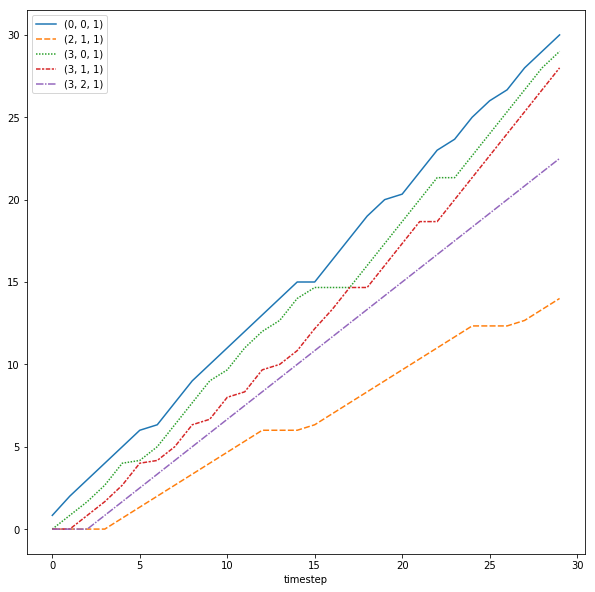

In [10]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_y_approach.cumsum())

### Comparing the Green Signal and the Flow

In [11]:
df_g_specific = df_g[df_g.cell == (1,0,1)].sort_values(by='timestep')
df_g_specific.cell = df_g_specific.cell.apply(lambda x: (CELL_MOVEMENT,THROUGH_TURN,1))
df_y_specific = df_y[(df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)) & (df_y.cell_to == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0])].sort_values(by='timestep')
df_y_specific = df_y_specific.groupby(['timestep', 'cell_from']).agg({'flow': 'sum'}).reset_index()

df_g_y = pd.merge(df_g_specific, df_y_specific, left_on=['timestep', 'cell'], right_on=['timestep', 'cell_from'])[
    ['timestep', 'is_green', 'flow']
]

df_g_y.set_index('timestep', inplace=True)

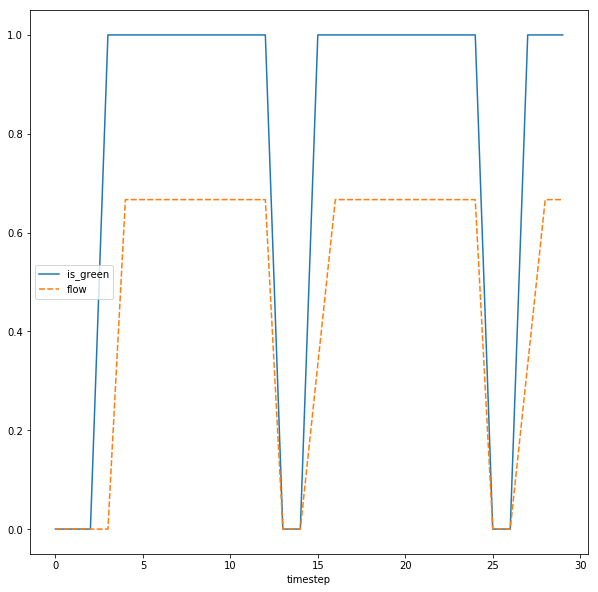

In [12]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_g_y)